<a href="https://colab.research.google.com/github/vktorbr/Heart-Failure-Prediction/blob/main/ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install scikit-multilearn --quiet

     |████████████████████████████████| 89 kB 5.2 MB/s 


In [14]:
!pip install matplotlib --upgrade --quiet

     |████████████████████████████████| 10.3 MB 30.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
#importacao de bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#renderizando a arvore de forma interativa
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sb
from imblearn.over_sampling import SMOTE


In [2]:
#carregando dataset
df = pd.read_csv('https://raw.githubusercontent.com/vktorbr/Heart-Failure-Prediction/main/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#informacao estatistica basica do dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
#informacoes sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
y = df['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [6]:
X = df.drop('DEATH_EVENT', axis=1)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


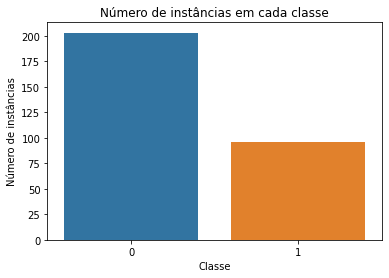

In [7]:
sb.countplot(y)
plt.xlabel('Classe')
plt.ylabel('Número de instâncias')
plt.title('Número de instâncias em cada classe')
plt.show()

In [8]:
smt = SMOTE()
X, y = smt.fit_sample(X, y)

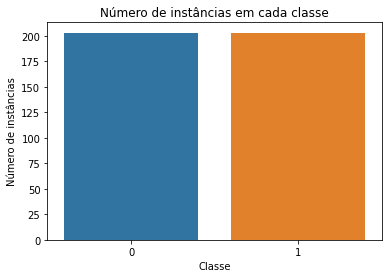

In [9]:
sb.countplot(y)
plt.xlabel('Classe')
plt.ylabel('Número de instâncias')
plt.title('Número de instâncias em cada classe')
plt.show()

In [10]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [11]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((324, 12), (324,)), ((82, 12), (82,)))

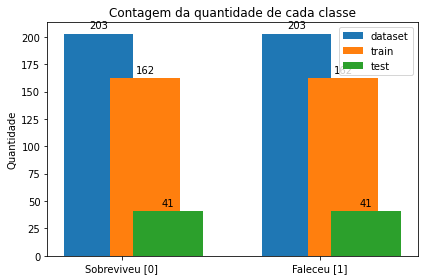

In [12]:

labels = ["Sobreviveu [0]", "Faleceu [1]"]

qt_y = np.unique(y, return_counts=True)[1]
qt_y_train = np.unique(y_train, return_counts=True)[1]
qt_y_test = np.unique(y_test, return_counts=True)[1]

x_bar = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x_bar - width/3, qt_y, width, label='dataset')
rects2 = ax.bar(x_bar + width/3, qt_y_train, width, label='train')
rects3 = ax.bar(x_bar + 2 * (width/3), qt_y_test, width, label='test')

ax.set_ylabel('Quantidade')
ax.set_title('Contagem da quantidade de cada classe')
ax.set_xticks(x_bar)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

Proporção mantida após a estratificação do dataset em treinamento e teste

In [13]:
total_data = sum(qt_y)
total_train = sum(qt_y_train)
total_test = sum(qt_y_test)

prop_data_sobreviveu = qt_y[0] / total_data
prop_data_faleceu = qt_y[1] / total_data

prop_train_sobreviveu = qt_y_train[0] / total_train
prop_train_faleceu = qt_y_train[1] / total_train

prop_test_sobreviveu = qt_y_test[0] / total_test
prop_test_faleceu = qt_y_test[1] / total_test

data = {
    'Sobreviveu [0]': [prop_data_sobreviveu, prop_train_sobreviveu, prop_test_sobreviveu],
    'Faleceu [1]': [prop_data_faleceu, prop_train_faleceu, prop_test_faleceu]
}

df_prop = pd.DataFrame(data, index=['dataset', 'train_set', 'test_set'])

df_prop

,Sobreviveu [0],Faleceu [1]
dataset,0.5,0.5
train_set,0.5,0.5
test_set,0.5,0.5


## Árvore de Decisão

In [18]:
#class label
class_label = ['Sobreviveu [0]', 'Faleceu [1]']

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf):
  estimator = DecisionTreeClassifier(
      random_state = 1,
      criterion = crit,
      splitter = split,
      max_depth = depth,
      min_samples_split = min_samples_split,
      min_samples_leaf = min_samples_leaf
  )

  #treinamento
  estimator.fit(X_train, y_train)

  resultado_train = estimator.predict(X_train)

  metrics_train = metrics.classification_report(y_train, resultado_train)

  
  #infos
  infos = ('Criterio:', crit, ' | ', 'Splitter:', split, ' | ', 'Max_depth:', depth, ' | ', 'min_samples_split:', min_samples_split, ' | ', 'min_samples_leaf:', min_samples_leaf)

  #teste
  resultado = estimator.predict(X_test)
  metricas = metrics.classification_report(y_test, resultado)

  return [accuracy_score(y_test, resultado), metricas, infos, metrics_train]

crits = ['entropy', 'gini']
splits = ['best', 'random']
depths = [None,1,2,3,4,5,10]
msps = [2,3,4,5]
msls = [1,2,3,4,5]

best = [0]
worst = [1]

for crit in crits:
  for split in splits:
    for depth in depths:
      for msp in msps:
        for msl in msls:
          result = plot_tree(crit, split, depth, msp, msl)
          if (result[0] > best[0]):
            best = result

          if (result[0] < worst[0]):
            worst = result

print("Melhor Árvore de Decisão")
print(best[2])
print("Metricas no Treinamento")
print(best[3])
print("Metricas no Teste")
print(best[1])

print("Pior Árvore de Decisão")
print(worst[2])
print("Metricas no Treinamento")
print(best[3])
print("Metricas no Teste")
print(worst[1])

Melhor Árvore de Decisão
('Criterio:', 'gini', ' | ', 'Splitter:', 'random', ' | ', 'Max_depth:', None, ' | ', 'min_samples_split:', 4, ' | ', 'min_samples_leaf:', 1)
Metricas no Treinamento
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       162

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324

Metricas no Teste
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.90      0.88      0.89        41

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82

Pior Árvore de Decisão
('Criterio:', 'entropy', ' | ', 'Splitter:', 'random', ' | ', 'Max_depth:', 5, ' | ', 'min_samples_split:', 2, ' |

## KNN

In [19]:
#class label
class_label = ['Sobreviveu [0]', 'Faleceu [1]']

def model(n_neighbor, weight, algorithm, leaf_size, p):
  estimator = KNeighborsClassifier(
      n_neighbors = n_neighbor,
      weights = weight,
      algorithm = algorithm,
      leaf_size = leaf_size,
      p = p
  )

  #treinamento
  estimator.fit(X_train, y_train)

  resultado_train = estimator.predict(X_train)

  metrics_train = metrics.classification_report(y_train, resultado_train)

  #infos
  infos = ('N_neighbors:', n_neighbor, ' | ', 'Weights:', weight, ' | ', 'Algorithm:', algorithm, ' | ', 'Leaf_size:', leaf_size, ' | ', 'p:', p)

  #teste
  resultado = estimator.predict(X_test)
  metricas = metrics.classification_report(y_test, resultado)

  return [accuracy_score(y_test, resultado), metricas, infos, metrics_train]

n_neighbors = [1,2,3,4,5,6,7,8]
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_sizes = [5, 10, 20, 30, 50]
ps = [1, 2]


best = [0]
worst = [1]

for n_neighbor in n_neighbors:
  for weight in weights:
    for algorithm in algorithms:
      for leaf_size in leaf_sizes:
        for p in ps:
          result = model(n_neighbor, weight, algorithm, leaf_size, p)
          if (result[0] > best[0]):
            best = result

          if (result[0] < worst[0]):
            worst = result

print("Melhor KNN")
print(best[2])
print("Metricas no Treinamento")
print(best[3])
print("Metricas no Teste")
print(best[1])

print("Pior KNN")
print(worst[2])
print("Metricas no Treinamento")
print(best[3])
print("Metricas no Teste")
print(worst[1])

Melhor KNN
('N_neighbors:', 6, ' | ', 'Weights:', 'uniform', ' | ', 'Algorithm:', 'auto', ' | ', 'Leaf_size:', 5, ' | ', 'p:', 1)
Metricas no Treinamento
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       162
           1       0.74      0.60      0.66       162

    accuracy                           0.69       324
   macro avg       0.70      0.69      0.69       324
weighted avg       0.70      0.69      0.69       324

Metricas no Teste
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        41
           1       0.69      0.66      0.68        41

    accuracy                           0.68        82
   macro avg       0.68      0.68      0.68        82
weighted avg       0.68      0.68      0.68        82

Pior KNN
('N_neighbors:', 4, ' | ', 'Weights:', 'uniform', ' | ', 'Algorithm:', 'auto', ' | ', 'Leaf_size:', 5, ' | ', 'p:', 1)
Metricas no Treinamento
              precisio

## Random Forest

In [20]:
#class label
class_label = ['Sobreviveu [0]', 'Faleceu [1]']

def plot_tree(crit, n_estimator, depth, min_samples_split, min_samples_leaf):
  estimator = RandomForestClassifier(
      random_state = 1,
      criterion = crit,
      n_estimators = n_estimator,
      max_depth = depth,
      min_samples_split = min_samples_split,
      min_samples_leaf = min_samples_leaf
  )

  #treinamento
  estimator.fit(X_train, y_train)

  resultado_train = estimator.predict(X_train)

  metrics_train = metrics.classification_report(y_train, resultado_train)

  #infos
  infos = ('Criterio:', crit, ' | ', 'N_estimator:', n_estimator, ' | ', 'Max_depth:', depth, ' | ', 'min_samples_split:', min_samples_split, ' | ', 'min_samples_leaf:', min_samples_leaf)

  #teste
  resultado = estimator.predict(X_test)
  metricas = metrics.classification_report(y_test, resultado)

  return [accuracy_score(y_test, resultado), metricas, infos, metrics_train]

n_estimators = [25, 50, 75, 100, 125, 150, 200]
crits = ['entropy', 'gini']
depths = [None,1,2,3,4,5,10]
msps = [2,3,4,5]
msls = [1,2,3,4,5]


best = [0]
worst = [1]

for crit in crits:
  for n_estimator in n_estimators:
    for depth in depths:
      for msp in msps:
        for msl in msls:
          result = plot_tree(crit, n_estimator, depth, msp, msl)
          if (result[0] > best[0]):
            best = result

          if (result[0] < worst[0]):
            worst = result

print("Melhor Random Forest")
print(best[2])
print("Metricas no Treinamento")
print(best[3])
print("Metricas no Teste")
print(best[1])

print("Pior Random Forest")
print(worst[2])
print("Metricas no Treinamento")
print(best[3])
print("Metricas no Teste")
print(worst[1])

Melhor Random Forest
('Criterio:', 'entropy', ' | ', 'N_estimator:', 150, ' | ', 'Max_depth:', None, ' | ', 'min_samples_split:', 2, ' | ', 'min_samples_leaf:', 1)
Metricas no Treinamento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       162

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

Metricas no Teste
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.95      0.90      0.92        41

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82

Pior Random Forest
('Criterio:', 'entropy', ' | ', 'N_estimator:', 25, ' | ', 'Max_depth:', 1, ' | ', 'min_samples_split:', 2, ' | ', 'min_s